In [36]:
import pandas as pd
import numpy as np
from utilities.reader_tools.GenericDatasetReader import DataframeFromCSV

raw_population_df = DataframeFromCSV("population_total.csv")
raw_population_df

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


##### OVERVIEW

In [37]:
# Drop null values
raw_population_df.dropna(inplace=True)
raw_population_df

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


##### PIVOT TABLE

In [38]:
# Make the pivot table
population_df = raw_population_df.pivot(columns="country", 
                                        index="year", 
                                        values="population")

# Convert the index from float64 to int64 for better indexing performance and readability
population_df.index = population_df.index.astype(int)
population_df

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean Netherlands,Cayman Islands,Central African Republic,...,South Sudan,Spain,Sri Lanka,St. Vincent & Grenadines,State of Palestine,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos,Tuvalu,U.S. Virgin Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,43724.0,9165707.0,6953406.0,3329387.0,88631.0,133585.0,42086301.0,227138.0,7747210.0,8887274.0,79870.0,2303587.0,40708.0,197457.0,3331036.0,2936309.0,463359.0,62533919.0,7679.0,63356.0,7561493.0,4517155.0,2537157.0,197195.0,5045288.0,4706995.0,15673763.0,7670.0,6677.0,1401341.0,...,2619712.0,29048395.0,8778438.0,73554.0,987755.0,6549298.0,249000.0,7262623.0,4957066.0,3911501.0,9189972.0,1794416.0,8729662.0,23711132.0,439223.0,1473839.0,1607.0,55322.0,739709.0,3943540.0,24270600.0,1364635.0,5238.0,5069.0,29682.0,5888793.0,40019491.0,79578.0,51063902.0,171685336.0,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,54211.0,10242076.0,7070766.0,3895397.0,109534.0,162427.0,48013504.0,230980.0,8124881.0,9167365.0,92064.0,2431622.0,44979.0,223288.0,3656955.0,3225668.0,502745.0,72179226.0,8048.0,81702.0,7885607.0,4829288.0,2797932.0,201765.0,5722370.0,5176918.0,17847405.0,8074.0,7865.0,1501668.0,...,2842724.0,30402411.0,9874476.0,80977.0,1069320.0,7544491.0,287871.0,7482543.0,5280680.0,4573512.0,10876150.0,2087049.0,10052152.0,27397207.0,474532.0,1580513.0,1873.0,61577.0,847979.0,4178236.0,27472345.0,1603258.0,5824.0,5323.0,33135.0,6767095.0,42664652.0,92418.0,52370602.0,186720571.0,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,57360.0,11313195.0,7305158.0,4592609.0,140059.0,187431.0,55385112.0,235413.0,8505722.0,9443939.0,106119.0,2632356.0,49388.0,253994.0,4038872.0,3535643.0,559994.0,83373530.0,8830.0,102386.0,8222589.0,5174870.0,3094379.0,230418.0,6467197.0,5773543.0,19627980.0,9134.0,8369.0,1639706.0,...,3133150.0,32146263.0,11110820.0,86011.0,1191379.0,8770097.0,328936.0,7745673.0,5812851.0,5373137.0,12901155.0,2487976.0,11634832.0,31822660.0,519686.0,1708630.0,1922.0,74345.0,911737.0,4547941.0,30972994.0,1892599.0,5823.0,5386.0,50233.0,7986066.0,45264548.0,149857.0,54240850.0,199733676.0,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,59063.0,12793034.0,7516239.0,5180023.0,169377.0,212605.0,64232482.0,238896.0,8913552.0,9632180.0,122182.0,2912340.0,52565.0,297316.0,4484004.0,3760529.0,627715.0,95113265.0,9827.0,129529.0,8507551.0,5624600.0,3479074.0,268627.0,6996576.0,6519762.0,21374326.0,10359.0,9144.0,1811144.0,...,3494004.0,33883749.0,12485740.0,90509.0,1126629.0,10281700.0,367931.0,8054916.0,6150852.0,6350541.0,14924455.0,2930107.0,13535481.0,36884536.0,571565.0,2115522.0,1621.0,84351.0,945360.0,5063809.0,34876303.0,2195175.0,5841.0,5735.0,64726.0,9405600.0,47088857.0,234514.0,55573453.0,209513341.0,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,61

In [39]:
population_df = population_df.loc[:, ["United States", "India", "China", "Indonesia", "Brazil"]]
population_df

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


##### VISUALIZATIONS

###### 1. LINEPLOT

<Axes: title={'center': 'Population x year'}, xlabel='Year', ylabel='Population'>

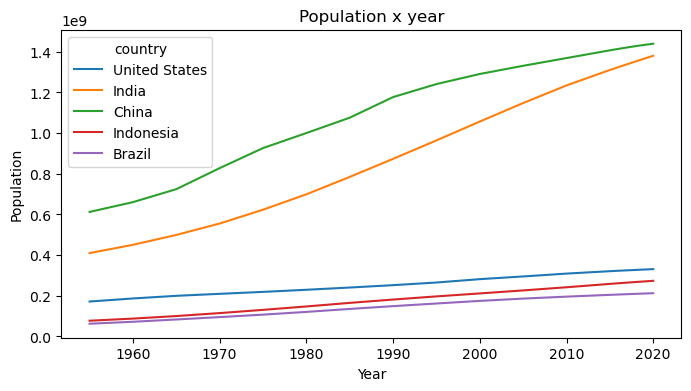

In [40]:
population_df.plot(kind="line", xlabel="Year", ylabel="Population", title="Population x year", figsize=(8,4))

###### 2. BARPLOT

In [49]:
# Select year 2020
population_2020 = population_df.loc[2020, :]
population_2020

country
United States    3.310027e+08
India            1.380004e+09
China            1.439324e+09
Indonesia        2.735236e+08
Brazil           2.125594e+08
Name: 2020, dtype: float64

<Axes: xlabel='country', ylabel='Population'>

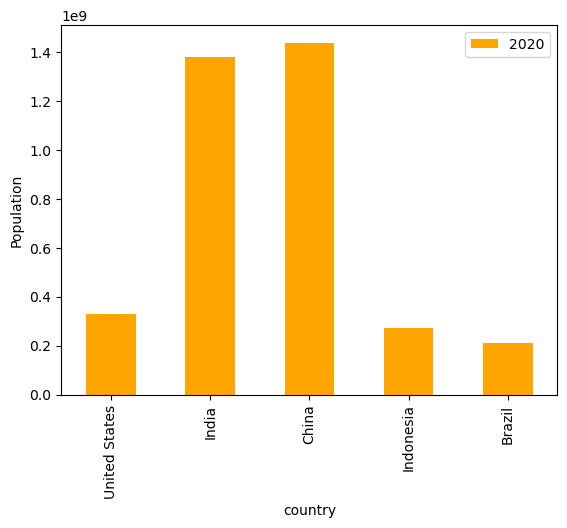

In [53]:
population_2020.plot(kind="bar", color="orange", legend=True, ylabel="Population")

###### 3. GROUPED BARPLOT

In [ ]:
population_df.index.isin([1980, 1990, 2020])

array([False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True])

In [61]:
population_variousYears = population_df[population_df.index.isin([1980, 1990, 2020])] 
population_variousYears

country,United States,India,China,Indonesia,Brazil
year,,,,,
1980,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1990,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
2020,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0
